In [1]:
from Learning_Agent import *
from Clairvoyant_non_stationary import *
from EXP3 import *
from CUSUM import *
from FIFO import *
from Non_Stationary_Class_1 import *
from Non_Stationary_Env import *
from UCB1_active import *
from UCB1_non_stationary_passive import *
import Functions as f
import Plots as p
import matplotlib.pyplot as plt

In [2]:
p1=[[0.8,0.7,0.4,0.2,0.1],
   [0.3,0.3,0.4,0.6,0.7],
   [0.6,0.7,0.8,0.4,0.2],
]

c1=(3,85,10000)

cum1=700


classes= Non_Stationary_Class_1(p1 ,c1 ,cum1,3)

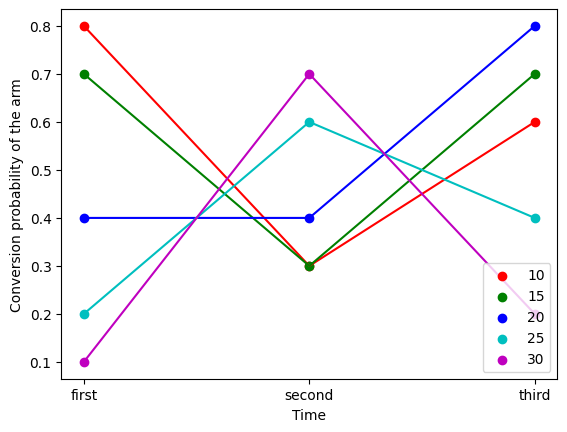

In [3]:
# Create a list of colors for the lines
colors = ['r', 'g', 'b', 'c', 'm']
plt.figure(1)
# Plot each row as a separate line with a different color
plt.plot( [p1[0][0],p1[1][0],p1[2][0]], c='r' )
plt.plot( [p1[0][1],p1[1][1],p1[2][1]], c='g' )
plt.plot( [p1[0][2],p1[1][2],p1[2][2]], c='b' )
plt.plot( [p1[0][3],p1[1][3],p1[2][3]], c='c' )
plt.plot( [p1[0][4],p1[1][4],p1[2][4]], c='m')

plt.scatter([0,1,2], [p1[0][0],p1[1][0],p1[2][0]], c='r' , label='10')
plt.scatter([0,1,2], [p1[0][1],p1[1][1],p1[2][1]], c='g' , label='15')
plt.scatter([0,1,2], [p1[0][2],p1[1][2],p1[2][2]], c='b' , label='20')
plt.scatter([0,1,2], [p1[0][3],p1[1][3],p1[2][3]], c='c' , label='25')
plt.scatter([0,1,2], [p1[0][4],p1[1][4],p1[2][4]], c='m' , label='30')

valori_x_da_mostrare=[0,1,2]
etichette_x_da_mostrare=['first' ,'second' , 'third']
plt.xticks(valori_x_da_mostrare, etichette_x_da_mostrare)


# Add labels and legend
plt.ylabel('Conversion probability of the arm')
plt.xlabel('Time')
plt.legend()

# Show the plot
plt.show()

In [5]:
X=[10,15,20,25,30]

In [6]:
env=Non_Stationary_Env(5,100,365,classes)
pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)

In [7]:
runs=20
T=365

cum_regret_ucb_multi=[]
cum_reward_ucb_multi=[]
istant_regret_ucb_multi=[]
istant_reward_ucb_multi=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    ucb1=UCB1_non_stationary_passive(pricing_arms, 20)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,100,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_UCB=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_UCB=[0]
    regret_UCB=np.zeros(T)
    reward_UCB=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=ucb1.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
    
        ucb1.update(played_price,reward)
    
        cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
        reward_UCB[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_ucb_multi.append(cum_regret_UCB)
    cum_reward_ucb_multi.append(cum_reward_UCB)
    istant_regret_ucb_multi.append(regret_UCB)
    istant_reward_ucb_multi.append(reward_UCB)

In [8]:
runs=20
T=365

cum_regret_ucb_multi1=[]
cum_reward_ucb_multi1=[]
istant_regret_ucb_multi1=[]
istant_reward_ucb_multi1=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)
detector=CUSUM(pricing_arms,20,0.05,0.8)



for r in range(runs):
    # Creation of the UCB1
    ucb1_active=UCB1_active(pricing_arms,0.083)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,100,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_UCB=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_UCB=[0]
    regret_UCB=np.zeros(T)
    reward_UCB=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=ucb1_active.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        sample=reward[0]/reward[1]
       

        
        if(detector.update(played_price,sample)): 
            ucb1_active.change_detected(played_price)
            detector.reset(played_price)
            #print("trovato")
    
        ucb1_active.update(played_price,reward)
    
        cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
        reward_UCB[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_ucb_multi1.append(cum_regret_UCB)
    cum_reward_ucb_multi1.append(cum_reward_UCB)
    istant_regret_ucb_multi1.append(regret_UCB)
    istant_reward_ucb_multi1.append(reward_UCB)

In [9]:
e = EXP3(pricing_arms, 0.1)

In [10]:
import random as r

In [12]:
runs=20
T=365

cum_regret_exp3_multi=[]
cum_reward_exp3_multi=[]
istant_regret_exp3_multi=[]
istant_reward_exp3_multi=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 0.1)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)

        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi.append(cum_regret_exp3)
    cum_reward_exp3_multi.append(cum_reward_exp3)
    istant_regret_exp3_multi.append(regret_exp3)
    istant_reward_exp3_multi.append(reward_exp3)

In [13]:
x=[]
for i in range(len(cum_regret_exp3_multi[0])):
    x.append(i)

c:\Users\vargu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\vargu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


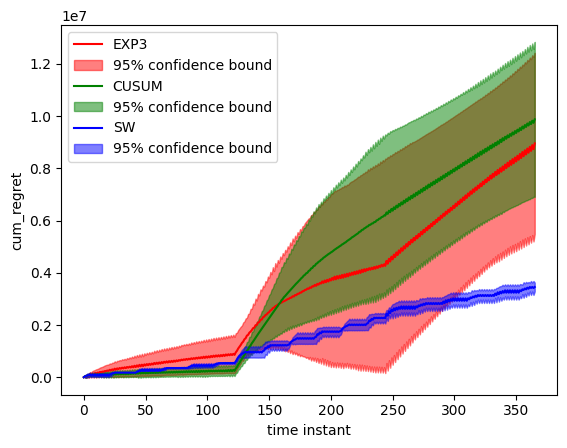

In [14]:
p.plot_comparison_multi(x,cum_regret_exp3_multi,
                        cum_regret_ucb_multi1,cum_regret_ucb_multi,
                        "EXP3","CUSUM","SW","cum_regret")

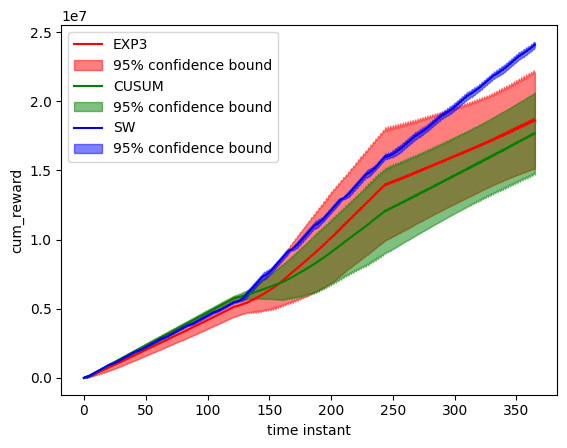

In [15]:
p.plot_comparison_multi(x,cum_reward_exp3_multi,
                        cum_reward_ucb_multi1,cum_reward_ucb_multi,
                        "EXP3","CUSUM","SW","cum_reward")

In [16]:
x=[]
for i in range(len(istant_regret_exp3_multi[0])):
    x.append(i)

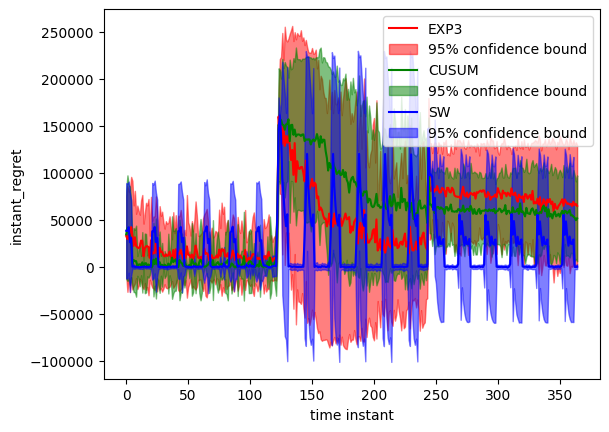

In [17]:
p.plot_comparison_multi(x,istant_regret_exp3_multi,
                        istant_regret_ucb_multi1,istant_regret_ucb_multi,
                        "EXP3","CUSUM","SW","instant_regret")

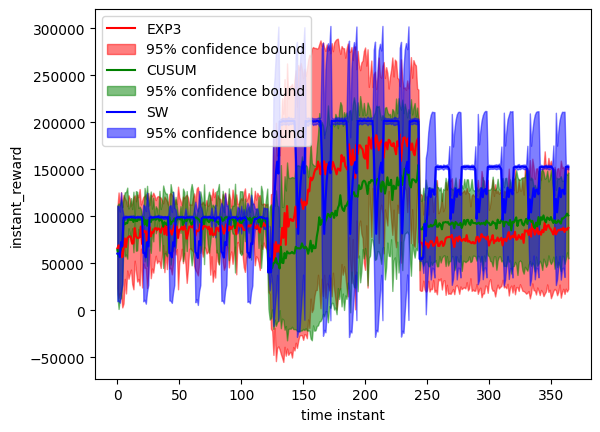

In [18]:
p.plot_comparison_multi(x,istant_reward_exp3_multi,
                        istant_reward_ucb_multi1,istant_reward_ucb_multi,
                       "EXP3","CUSUM","SW","instant_reward")